In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
from collections import Counter
pd.set_option('display.max_columns', 50)

In [2]:
orders = pd.read_csv('../Data/Processed/orders.csv', encoding='utf-8')

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,O cliente não comentou,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,O cliente não comentou,O cliente não comentou,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,O cliente não comentou,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,66922902710d126a0e7d26b0e3805106,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,O cliente não comentou,O cliente não comentou,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,2c9e548be18521d1c43cde1c582c6de8,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


# 1. Descriptive analysis

In [4]:
orders['comment_present'] = orders.review_comment_message != 'O cliente não comentou'

## 1.1 Answering to survey

(<seaborn.axisgrid.FacetGrid at 0x245233c1550>, count    95978.000000
 mean         4.144356
 std          1.294795
 min          1.000000
 25%          4.000000
 50%          5.000000
 75%          5.000000
 max          5.000000
 Name: review_score, dtype: float64)

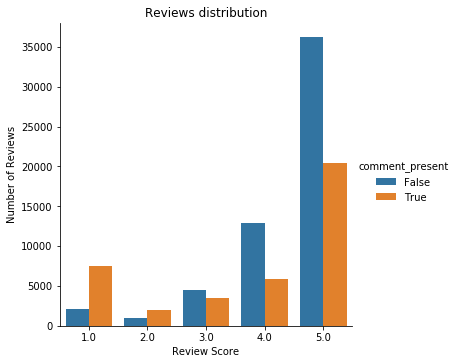

In [5]:
sns.catplot(x='review_score', kind='count', data=orders, hue='comment_present')\
.set(xlabel='Review Score', ylabel='Number of Reviews', title='Reviews distribution'), orders.review_score.describe()

Most reviews are good ones, we can see that the average review score is 4.14, with a median quartile at 5. Furthemore, for almost half of the orders Olist did not receive any customer feedback. Looking at the difference between 1 score reviews and 5 ones, we notice that customers who answered positively in the survey are less likely to leave comments while customers who gave bad feedback are more likely to do it.

## 1.2 Survey message length

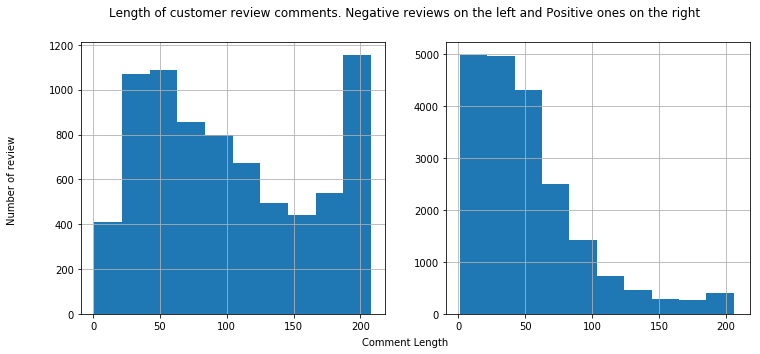

In [6]:
dims = (12, 5)
fig, ax =plt.subplots(1,2,figsize=dims, sharex=True)
fig.text(0.5, 0.04, 'Comment Length', ha='center')
fig.text(0.04, 0.5, 'Number of review', va='center', rotation='vertical')

fig.suptitle('Length of customer review comments. Negative reviews on the left and Positive ones on the right')
orders[(orders['comment_present'] == True) & (orders['review_score'] == 1)]\
.review_comment_message.map(lambda x : len(str(x))).hist(ax=ax[0])
orders[(orders['comment_present'] == True) & (orders['review_score'] == 5)]\
.review_comment_message.map(lambda x : len(str(x))).hist(ax=ax[1])

plt.show()

When looking at the survey comments between negative (score = 1) and positive (score = 5) feedbacks, we notice that positive feedbacks tend to be shorter and less succint than negative ones. 

# 2. Sentiment Analysis

We will try to discover if there are recurrent pattern regarding negative or positive patterns, i.e, what were the customers complaining about or what did they really like ?

Henceforth, we will only focus on orders for which the customers did leave an answer in the survey and for which the review score is 1 or 5. For those which they did not, we we will try to discover later what could have gone wrong.

In [7]:
orders_commented = orders[orders['comment_present'] == True]
orders_commented = orders_commented[(orders_commented['review_score'] == 1) | (orders_commented['review_score'] == 5)]

In [8]:
orders_commented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27903 entries, 3 to 95977
Data columns (total 37 columns):
order_id                         27903 non-null object
customer_id                      27903 non-null object
order_status                     27903 non-null object
order_purchase_timestamp         27903 non-null object
order_approved_at                27903 non-null object
order_delivered_carrier_date     27903 non-null object
order_delivered_customer_date    27903 non-null object
order_estimated_delivery_date    27903 non-null object
payment_sequential               27903 non-null float64
payment_type                     27903 non-null object
payment_installments             27903 non-null float64
payment_value                    27903 non-null float64
customer_unique_id               27903 non-null object
customer_zip_code_prefix         27903 non-null float64
customer_city                    27903 non-null object
customer_state                   27903 non-null object
review_

In [9]:
orders_commented = orders_commented.astype({"order_status" : 'category', \
                       "order_purchase_timestamp" : 'datetime64[ns]', "order_approved_at" : 'datetime64[ns]', \
                       "order_delivered_carrier_date" : 'datetime64[ns]', "order_delivered_customer_date" : 'datetime64[ns]', \
                       "order_estimated_delivery_date" : 'datetime64[ns]', 'review_creation_date':'datetime64[ns]', \
                        "review_answer_timestamp" : 'datetime64[ns]', "shipping_limit_date" : 'datetime64[ns]', \
                        "product_category_name" : 'category', 
                       })

## 2.1 Customer Experience

What customers like and dislike the most about Olist's experience ? 

In [10]:
import nltk
import unicodedata

In [11]:
# Source
#https://stackoverflow.com/questions/14682397/how-does-unicodedata-normalizeform-unistr-work
#https://en.wikipedia.org/wiki/Unicode_equivalence
def normalize_form(sentence):
    return unicodedata.normalize('NFKD', sentence).encode('ascii', errors='ignore').decode('utf-8')

stopw = set(normalize_form(w) for w in nltk.corpus.stopwords.words('portuguese'))
stopw.remove('nao') #useful to understand sentiment


def sentence_to_words(sentence):
    normalized = normalize_form(sentence.lower())
    tokens = nltk.tokenize.word_tokenize(normalized)
    words = tuple(t for t in tokens if t not in stopw and t.isalpha())
    return words

def words_to_ngrams(words):
    trigrams = []
    for w in words:
        trigrams.extend(' '.join(trigram) for trigram in nltk.trigrams(w))
    
    return trigrams

In [12]:
orders_commented['review_comment_words'] = orders_commented['review_comment_message'].apply(sentence_to_words)

positive_reviews = orders_commented[orders_commented['review_score'] == 5]
negative_reviews = orders_commented[orders_commented['review_score'] == 1]

positive_trigrams = words_to_ngrams(positive_reviews['review_comment_words'])
negative_trigrams = words_to_ngrams(negative_reviews['review_comment_words'])

**Are there important topics where extra caution is advised ?**

In [13]:
top20_positive = dict(Counter(positive_trigrams).most_common(20))
top20_negative = dict(Counter(negative_trigrams).most_common(20))

In [14]:
trigrams = pd.DataFrame(list(zip(top20_positive.keys(), top20_positive.values(), \
                                                  top20_negative.keys(),top20_negative.values())), \
                  columns =['positive_trigram','positive_count', 'negative_trigram', 'negative_count'])

In [15]:
trigrams

,positive_trigram,positive_count,negative_trigram,negative_count
0,chegou antes prazo,904,nao recebi produto,642
1,bem antes prazo,579,ainda nao recebi,313
2,entregue antes prazo,508,produto nao entregue,175
3,entrega antes prazo,367,produto nao chegou,113
4,produto chegou antes,354,produto ainda nao,111
5,chegou bem antes,346,ainda nao chegou,85
6,produto entregue antes,310,momento nao recebi,81
7,entrega super rapida,287,ainda nao entregue,75
8,produto otima qualidade,249,agora nao recebi,71
9,antes prazo previsto,225,produto pessima qualidade,53


In [16]:
from googletrans import Translator
from tqdm import tqdm

In [17]:
for i in tqdm(range(trigrams.shape[0])) :
    translator = Translator()
    trigrams.iloc[i,0] = translator.translate(trigrams.iloc[i,0], src='Pt', dest='en').text
    trigrams.iloc[i,2] = translator.translate(trigrams.iloc[i,2], src='Pt', dest='en').text

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.33it/s]


In [18]:
trigrams

,positive_trigram,positive_count,negative_trigram,negative_count
0,arrived before deadline,904,I did not recieve the product,642
1,well before term,579,I have not received it yet.,313
2,delivered before term,508,product not delivered,175
3,delivery before term,367,product has not arrived,113
4,product arrived before,354,product not yet,111
5,arrived well before,346,it did not arrive yet,85
6,product delivered before,310,I did not receive the moment,81
7,Super fast delivery,287,not yet delivered,75
8,great quality product,249,I have not received it now,71
9,ahead of schedule,225,Related searches,53


When looking at the table :

- We got positive feedback from the customers mainly because the delivery service was great in terms of delivery time and because of the good product quality.
- Among negative sentiments however, the customers complains about the  delivery service : they either received the wrong product or they had to answer the survey before even getting the product. Furthermore, they also complained a lot about the bad quality of the product and want a refund.

**Hence, during our Customer sentiment analysis, we noticed some directions where Olist can elaborate strategies for customer retentions. Although most customers seem happy, since the average score is 4.1, some of them are still not satisfied enough. Since we know that customer acquisition may be sometimes harder than customer retention, we advise Olist to pay attention to the sectors where customers are mainly satisfied (product quality and delivery service quality) and to be even more careful why in the same areas some customers are not satisfied enough. We may want to further this analysis, taking into account that there are lot of sellers in Olist platform, and it might be a good idea to spot which sellers do provide a lower quality product and delivery service to present to the stakeholders which will be in charge of taking actual decisions.**

# 3 Silent customers

Some customers didn't write a review. But why are they happy or mad?

In [19]:
silent_orders = orders[orders['comment_present'] == False]
silent_orders = silent_orders[(silent_orders['review_score'] == 1) | (silent_orders['review_score'] == 5)]

In [20]:
silent_orders = silent_orders.astype({"order_status" : 'category', \
                       "order_purchase_timestamp" : 'datetime64[ns]', "order_approved_at" : 'datetime64[ns]', \
                       "order_delivered_carrier_date" : 'datetime64[ns]', "order_delivered_customer_date" : 'datetime64[ns]', \
                       "order_estimated_delivery_date" : 'datetime64[ns]', 'review_creation_date':'datetime64[ns]', \
                        "review_answer_timestamp" : 'datetime64[ns]', "shipping_limit_date" : 'datetime64[ns]', \
                        "product_category_name" : 'category', 
                       })

In [21]:
negative_silent_orders = silent_orders[silent_orders['review_score'] == 1]
negative_silent_orders.order_status.unique(), negative_silent_orders.shape

([delivered]
 Categories (1, object): [delivered], (2080, 37))

It seems that all orders have been submitted, but when ? Let's try to find out ! 

In [22]:
late_deliveries = negative_silent_orders[negative_silent_orders['order_delivered_customer_date'] > negative_silent_orders['order_estimated_delivery_date']]

In [23]:
late_deliveries.shape

(1047, 37)

Interesting ! It seems that half of the negative reviews which resulted in not answering to the customer satisfaction survey were orders which actually arrived but late . Let's look at the distribution of the delays.

In [24]:
late_deliveries['delay'] = ((late_deliveries['order_delivered_customer_date'] - late_deliveries['order_estimated_delivery_date']).dt.days)

C:\Anaconda\envs\ada\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


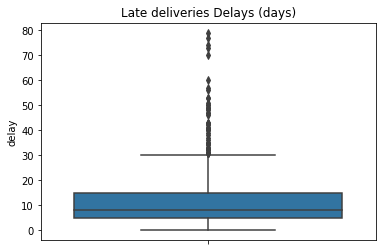

In [25]:
sns.boxplot(y='delay', data=late_deliveries)
plt.title('Late deliveries Delays (days)')
plt.show()

Most of the late deliveries range between 5 and 15 days, but we observe lot of outliers which indicate that some orders where actually delivered more than 30 days, i.e a month, late !

Let's have a look at the time they received the survey and the time they received the products.

In [26]:
negative_silent_orders['delivery_to_survey_delay'] = ((negative_silent_orders['review_creation_date'] - negative_silent_orders['order_delivered_customer_date']).dt.days)

C:\Anaconda\envs\ada\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


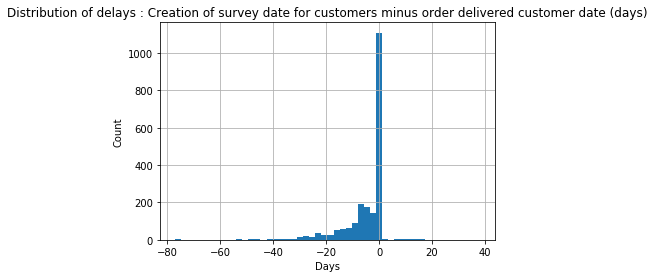

In [27]:
negative_silent_orders.delivery_to_survey_delay.hist(bins=50)
plt.title('Distribution of delays : Creation of survey date for customers minus order delivered customer date (days)')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

While a majority of the survey where sent when the clients actually received their orders, we notice that a non-negligeable part of those surveys where sent by the customers before they actually received their order. When reading the description of "review_creation_Date", it says that this is the date when the customer receives the order OR when estimated delivery date to the customer is due. Hence, it is the same problem as before, delivery time again...